In [1]:
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = 0.5*(m+3*g*q*q)*(b*bdag - bdag*b)

In [3]:
hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  2**2, standard_encode)

In [4]:
hamAHO.harmonic

0.5*a*ad + 0.25*a*ad*a*ad + 0.0625*a*ad*a*ad*a*ad + 0.0625*a*ad*a*ad*a**2 + 0.0625*a*ad*a*ad**2*a + 0.0625*a*ad*a*ad**3 + 0.25*a*ad*a**2 + 0.0625*a*ad*a**2*ad*a + 0.0625*a*ad*a**2*ad**2 + 0.0625*a*ad*a**3*ad + 0.0625*a*ad*a**4 + 0.25*a*ad**2*a + 0.0625*a*ad**2*a*ad*a + 0.0625*a*ad**2*a*ad**2 + 0.0625*a*ad**2*a**2*ad + 0.0625*a*ad**2*a**3 + 0.25*a*ad**3 + 0.0625*a*ad**3*a*ad + 0.0625*a*ad**3*a**2 + 0.0625*a*ad**4*a + 0.0625*a*ad**5 + 0.25*a**2*ad*a + 0.0625*a**2*ad*a*ad*a + 0.0625*a**2*ad*a*ad**2 + 0.0625*a**2*ad*a**2*ad + 0.0625*a**2*ad*a**3 + 0.25*a**2*ad**2 + 0.0625*a**2*ad**2*a*ad + 0.0625*a**2*ad**2*a**2 + 0.0625*a**2*ad**3*a + 0.0625*a**2*ad**4 + 0.25*a**3*ad + 0.0625*a**3*ad*a*ad + 0.0625*a**3*ad*a**2 + 0.0625*a**3*ad**2*a + 0.0625*a**3*ad**3 + 0.25*a**4 + 0.0625*a**4*ad*a + 0.0625*a**4*ad**2 + 0.0625*a**5*ad + 0.0625*a**6 + 0.5*ad*a + 0.25*ad*a*ad*a + 0.0625*ad*a*ad*a*ad*a + 0.0625*ad*a*ad*a*ad**2 + 0.0625*ad*a*ad*a**2*ad + 0.0625*ad*a*ad*a**3 + 0.25*ad*a*ad**2 + 0.0625*ad*a*ad*

In [5]:
eigs={}
for gi in np.arange(0,1,0.1):
    hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:gi},
                  2**2, standard_encode)
    eigs[gi]=np.sort(np.linalg.eig(np.matrix(hamAHO.bmatrix,float))[0])

In [6]:
x=[]
y=[]
for k,v in eigs.items():
    x.append([k + (n*0.005) for n in range(len(v))])
    y.append(v)

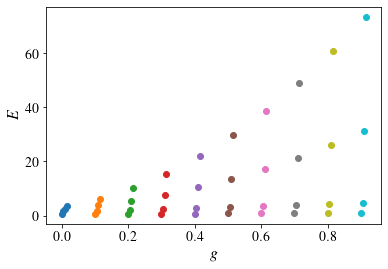

In [7]:
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.xlabel('$g$')
plt.ylabel('$E$')
plt.show()

In [8]:
eigs={}
for gi in np.arange(0,1.1,0.1):
    hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:gi},
                  2**3, standard_encode)
    eigs[gi]=np.sort(np.linalg.eig(np.matrix(hamAHO.hamMatrix,float))[0])

/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


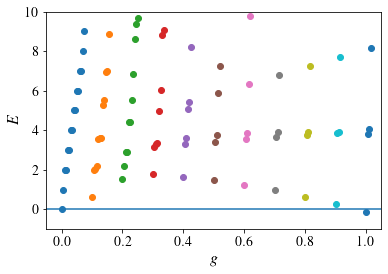

In [9]:
x=[]
y=[]
for k,v in eigs.items():
    x.append([k + (n*0.005) for n in range(len(v))])
    y.append(v)
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(10)],[0 for y in range(10)])
plt.xlabel('$g$')
plt.ylabel('$E$')
plt.xlim(-0.05,1.05)
plt.ylim(-1,10)
plt.show()

In [10]:
hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  2**2, standard_encode)
print(np.sort(np.linalg.eig(np.matrix(hamAHO.hamMatrix,float))[0]))

[ 0.12682403  2.08341082  3.323419    7.31797807 32.24817597 41.29158918
 81.301581   94.30702193]


In [2]:
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = 0.5*(m+2*g*q)*(b*bdag-bdag*b)

hamDW = Hamiltonian(h_b_DW, h_f_DW, {m:1, g: 0, mu: 0},
                     2**2, standard_encode)
print(np.sort(np.linalg.eig(np.matrix(hamDW.hamMatrix,float))[0]))

[0. 1. 2. 2. 3. 3. 4. 5.]


/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


In [24]:
eigs={}
for imu in np.arange(0,1.1,0.1):
    hamDW = Hamiltonian(h_b_DW, h_f_DW, {m:1, g: 1, mu: imu},
                     2**2, standard_encode)
    eigs[imu]=np.sort(np.linalg.eig(np.matrix(hamDW.hamMatrix,float))[0])

/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


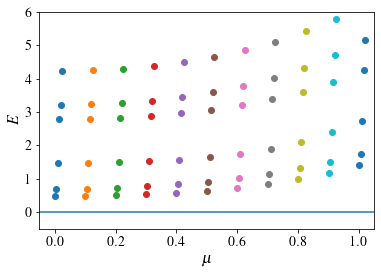

In [27]:
x=[]
y=[]
for k,v in eigs.items():
    x.append([k + (n*0.005) for n in range(len(v))])
    y.append(v)
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-2 for x in range(10)],[0 for y in range(10)])
plt.xlabel('$\mu$')
plt.ylabel('$E$')
plt.xlim(-0.05,1.05)
plt.ylim(-0.5,6)
plt.savefig('PLOTS/dw_g1.0.pdf')

In [14]:
eigs[1.0]

array([ 1.4159633 ,  1.74477792,  2.7382935 ,  4.25641082,  5.14441227,
        6.25611694, 21.76081164, 25.6832136 ])

In [4]:
eigs={}
for ig in np.arange(-1.1,1.1,0.5):
    hamDW = Hamiltonian(h_b_DW, h_f_DW, {m:1, g: ig, mu: 1},
                     2**2, standard_encode)
    eigs[ig]=np.sort(np.linalg.eig(np.matrix(hamDW.hamMatrix,float))[0])

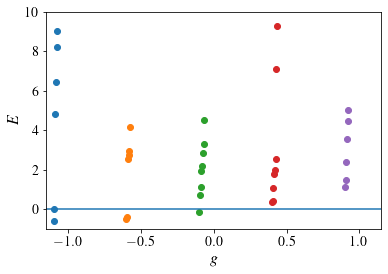

In [9]:
x=[]
y=[]
for k,v in eigs.items():
    x.append([k + (n*0.005) for n in range(len(v))])
    y.append(v)
for i in range(len(eigs)):
    plt.scatter(x[i],y[i])
plt.plot([x-10 for x in range(20)],[0 for y in range(20)])
plt.xlabel('$g$')
plt.ylabel('$E$')
plt.xlim(-1.15,1.15)
plt.ylim(-1,10)
plt.savefig('PLOTS/dw_mu1.0.pdf')

In [10]:
eigs

{-1.1: array([-5.97420703e-01,  1.63266007e-03,  4.83728230e+00,  6.45770839e+00,
         8.21061428e+00,  9.03237782e+00,  2.41937072e+01,  2.79940980e+01]),
 -0.6000000000000001: array([-0.48340964, -0.3758694 ,  2.53939043,  2.7400371 ,  2.9287443 ,
         4.17584294, 10.44773467, 13.10752959]),
 -0.10000000000000009: array([-0.11380065,  0.73631995,  1.11814153,  1.9435905 ,  2.19639259,
         2.82943824,  3.31706862,  4.50284922]),
 0.3999999999999999: array([0.34508073, 0.43621943, 1.0563065 , 1.76081799, 2.00408499,
        2.52705435, 7.07779478, 9.27264123]),
 0.8999999999999999: array([ 1.12587791,  1.4684715 ,  2.37177908,  3.57989117,  4.48235065,
         5.00047533, 18.6242741 , 22.27688027])}

In [18]:
2.4841649198

2.4841649198